## Aurora Experiment Branches

In [1]:
import time

import ujson as json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.plotly as py

from moztelemetry import get_pings, get_pings_properties, get_newest_ping_per_client, get_clients_history

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sc.defaultParallelism

128

In [3]:
def strip_date(date):
    """
    Strips away the timestamp (in JS ISO format) and the dashes in the date.
    """
    return date[:10].replace("-", "")

Collect the pings:

In [4]:
pings = get_pings(sc, app="Firefox", channel="aurora", version="43.0a2", submission_date=("20151023", "20151029"))

In [5]:
props = get_pings_properties(pings, ["clientId",
                                     "creationDate",
                                     "meta/submissionDate",
                                     "environment/addons/activeExperiment/branch"])

Exclude pings created in the future:

In [6]:
props = props.filter(lambda p: strip_date(p["creationDate"]) <= p["meta/submissionDate"]).cache()

In [7]:
def plot_experiments(props):
    experiments = props.map(lambda p: (p["environment/addons/activeExperiment/branch"], 0)).countByKey()
    totalCount = sum(experiments.values())
    inactiveCount = experiments.get(None, 0)
    activeCount = totalCount - inactiveCount
    experimentPercentage = (100.0 * activeCount / totalCount)

    fig = plt.figure(figsize=(10, 10))
    frame = pd.Series(experiments)
    frame.plot('barh')
    plt.title("active experiments (%.1f%% of total)" % (experimentPercentage))
    plt.show()

###  Distribution of pings across different experiment branches

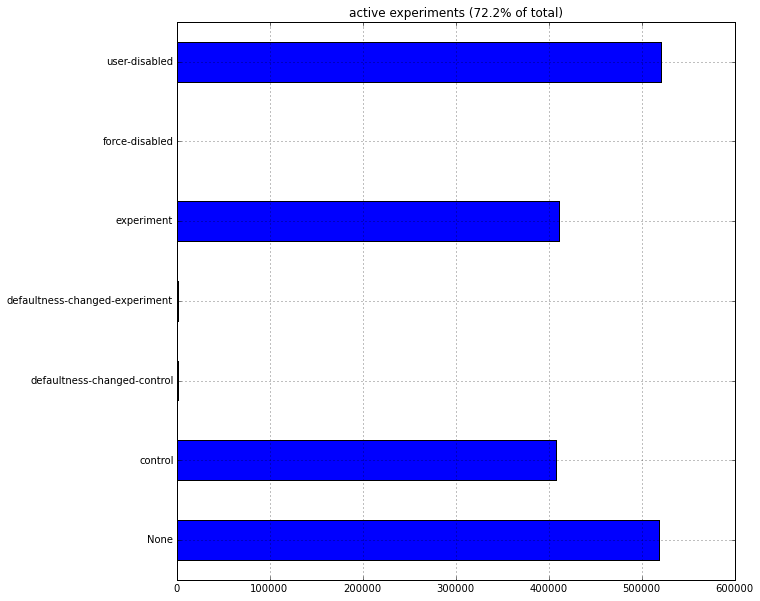

In [8]:
plot_experiments(props)

###  Distribution of clients across different experiment branches

This considers only the newest ping of each client.

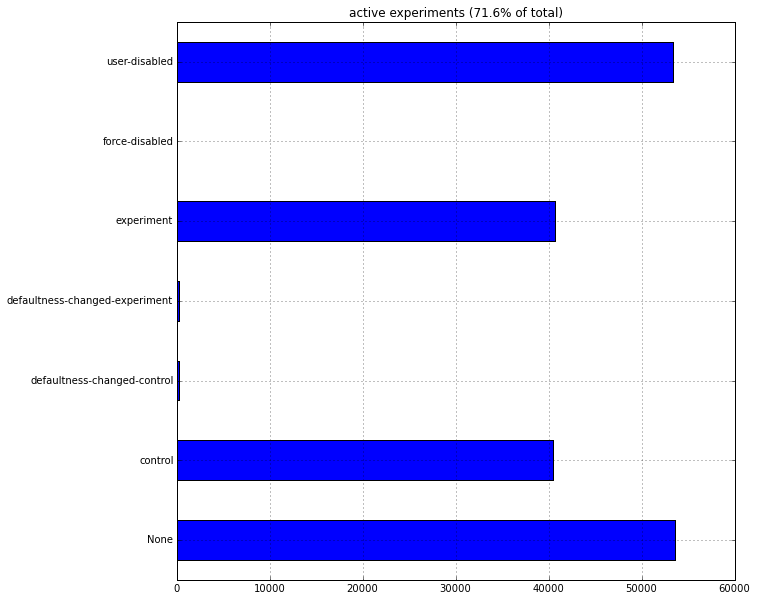

In [9]:
plot_experiments(get_newest_ping_per_client(props))